# EDA

In [442]:
#라이브러리 import
import pandas as pd #표 형태 분석 라이브러리
import numpy as np #계산 라이브러리
import matplotlib.pyplot as plt #그래프 라이브러리
import seaborn as sns

In [443]:
import matplotlib.font_manager as fm
import warnings

# 경고 제거
warnings.filterwarnings("ignore", message="Glyph")
warnings.filterwarnings("ignore", message="findfont")

# 폰트 파일 직접 등록
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)

font_prop = fm.FontProperties(fname=font_path).get_name()

plt.rcParams["font.family"] = font_prop
plt.rcParams["axes.unicode_minus"] = False

print("기본 폰트로 등록됨:", font_prop)

기본 폰트로 등록됨: NanumGothic


In [444]:
# findfont 경고 제거
import warnings

warnings.filterwarnings(
    "ignore",
    message="findfont: Font family"
)

In [445]:
#데이터셋 불러오기
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [446]:
#전체 행, 컬럼 개수
print("행,컬럼 개수:", df.shape)
df.info()

행,컬럼 개수: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimet

In [447]:
# 유일한 문자형 데이터 값들이 어떻게 구성되어 있는지 확인
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [448]:
#결측치 확인
n_rows, n_cols = df.shape

total_cells = n_rows * n_cols
total_missing = df.isna().sum().sum()
missing_ratio = total_missing / total_cells

print(f"전체 결측치 개수: {total_missing:,}")
print(f"전체 결측치 비율: {missing_ratio:.2%}")

전체 결측치 개수: 569
전체 결측치 비율: 3.03%


In [449]:
df.isnull().sum()[df.isnull().sum() > 0]

Unnamed: 32    569
dtype: int64

In [450]:
#원본 데이터 확인해 봤을 때 Unnamed: 32 컬럼에는 아무 데이터도 들어있지 않아 제거 하였음
df = df.drop(columns=['Unnamed: 32'])

- 컬럼 뜻

| 번호 | 컬럼명 (설명)                               | Non-Null Count | 데이터 타입 |
| -- | -------------------------------------- | -------------- | ------ |
| 0  | id (환자 고유 식별자)           | 569            | 숫자형    |
| 1  | diagnosis (유방암 진단 결과: B=양성, M=악성)      | 569            | 문자형    |
| 2  | radius_mean (종양 반지름 평균)                | 569            | 숫자형    |
| 3  | radius_se (종양 반지름의 표준오차)               | 569            | 숫자형    |
| 4  | radius_worst (종양 반지름 최댓값)         | 569            | 숫자형    |
| 5  | perimeter_mean (종양 둘레 평균)              | 569            | 숫자형    |
| 6  | texture_mean (종양 표면 질감)           | 569            | 숫자형    |
| 7  | texture_se (종양 표면 질감 표준오차)            | 569            | 숫자형    |
| 8  | texture_worst (종양 표면 질감 최댓값)      | 569            | 숫자형    |
| 9  | area_mean (종양 면적 평균)                   | 569            | 숫자형    |
| 10 | area_se (종양 면적의 표준오차)                  | 569            | 숫자형    |
| 11 | area_worst (종양 면적 중 최댓값)            | 569            | 숫자형    |
| 12 | smoothness_mean (종양 표면의 부드러움 평균)       | 569            | 숫자형    |
| 13 | smoothness_se (표면 부드러움의 표준오차)          | 569            | 숫자형    |
| 14 | smoothness_worst (표면 부드러움 최솟값)   | 569            | 숫자형    |
| 15 | compactness_mean (종양 조직의 밀도 평균)       | 569            | 숫자형    |
| 16 | compactness_se (밀도의 표준오차)             | 569            | 숫자형    |
| 17 | compactness_worst (조밀도 최댓값)       | 569            | 숫자형    |
| 18 | concavity_mean (종양 경계의 오목함 평균)      | 569            | 숫자형    |
| 19 | concavity_se (오목함 표준오차)            | 569            | 숫자형    |
| 20 | concavity_worst (오목함 최대값)         | 569            | 숫자형    |
| 21 | concave points_mean (오목한 지점의 개수 평균)    | 569            | 숫자형    |
| 22 | concave points_se (오목한 지점 개수 표준오차)    | 569            | 숫자형    |
| 23 | concave points_worst (오목한 지점 개수 최대값) | 569            | 숫자형    |
| 24 | symmetry_mean (종양 형태의 대칭성 평균)          | 569            | 숫자형    |
| 25 | symmetry_se (대칭성의 표준오차)                | 569            | 숫자형    |
| 26 | symmetry_worst (대칭성 최소값)         | 569            | 숫자형    |
| 27 | fractal_dimension_mean (종양 경계의 복잡도 평균) | 569            | 숫자형    |
| 28 | fractal_dimension_se (경계 복잡도의 표준오차)    | 569            | 숫자형    |
| 29 | fractal_dimension_worst (경계 복잡도 최대값) | 569            | 숫자형    |
| 30 | perimeter_se (종양 둘레의 표준오차)             | 569            | 숫자형    |
| 31 | perimeter_worst (종양 둘레 최대값)       | 569            | 숫자형    |


In [451]:
# 기본 통계
df.describe(include='all')
# 범주형,문자형 컬럼: count(결측치 제외 갯수), unique(고유값 갯수), top(가장 많이 등장한 값), freg(top값 빈도)
# 숫자형 컬럼: mean(평균), std(표준편차),min(최소값),max(최대값),25%(1사분위), 50%(중앙값),75%(3사분위),max(최대값)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


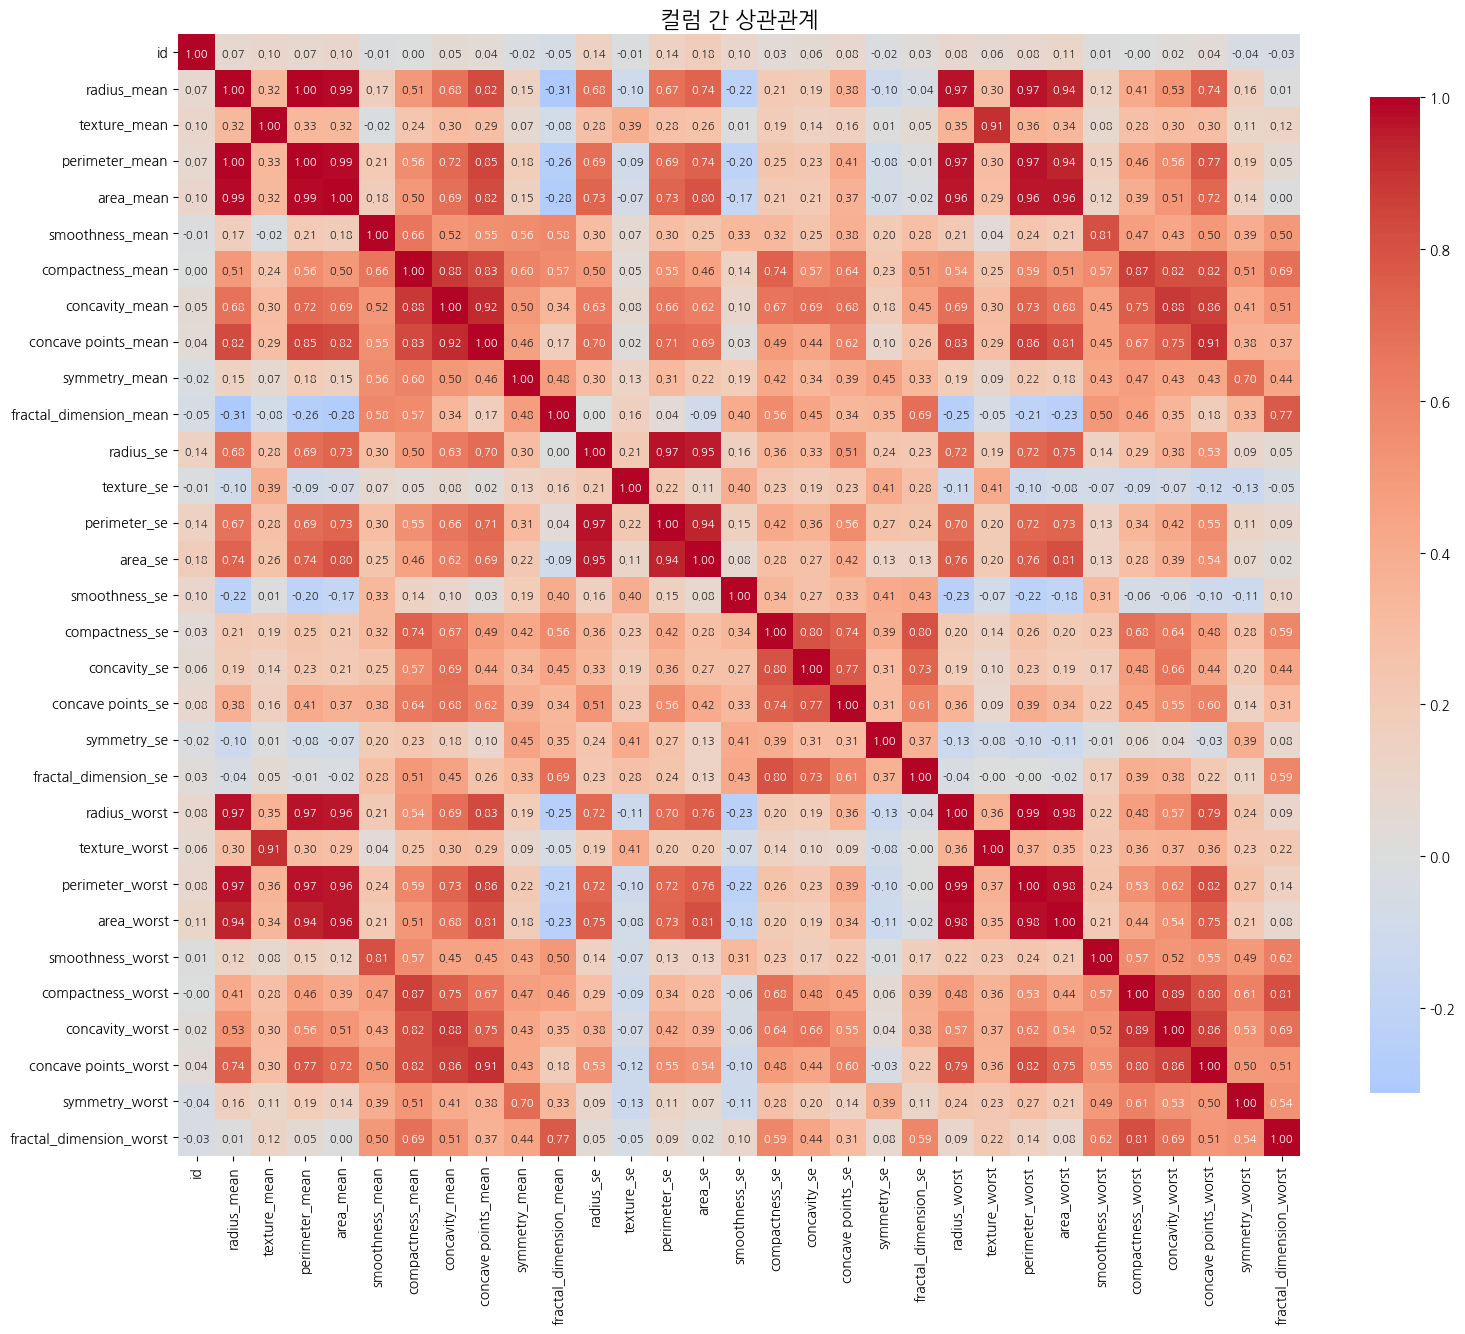

In [452]:
# 수치형 컬럼만 선택
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 14))

sns.heatmap(
    num_df.corr(),
    cmap="coolwarm",
    center=0,
    annot=True,            # ✅ 칸 안에 수치 표시
    fmt=".2f",             # ✅ 소수점 2자리
    annot_kws={"size": 8}, # ✅ 글씨 크기
    square=True,           # 보기 좋게 정사각형
    cbar_kws={"shrink": 0.8}
)

plt.title("컬럼 간 상관관계", fontproperties=font_prop, fontsize=16)
plt.tight_layout()
plt.show()

In [453]:
# 수치형 데이터
num_df = df.select_dtypes(include=['int64', 'float64'])

# 상관계수 계산
corr = num_df.corr()

# 자기 자신 제거 + 중복 제거용 마스크
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# 기준값 설정 (보통 0.7 이상)
high_corr_pairs = (
    upper_tri
    .stack()
    .reset_index()
)

high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# 절댓값 기준 필터링
high_corr_pairs = high_corr_pairs[
    high_corr_pairs['Correlation'].abs() >= 0.7
].sort_values(by='Correlation', key=np.abs, ascending=False)

high_corr_pairs.head(10)

,Feature_1,Feature_2,Correlation
31,radius_mean,perimeter_mean,0.997855
421,radius_worst,perimeter_worst,0.993708
32,radius_mean,area_mean,0.987357
87,perimeter_mean,area_mean,0.986507
422,radius_worst,area_worst,0.984015
437,perimeter_worst,area_worst,0.977578
276,radius_se,perimeter_se,0.972794
106,perimeter_mean,perimeter_worst,0.970387
49,radius_mean,radius_worst,0.969539
104,perimeter_mean,radius_worst,0.969476


- radius, perimeter, area의 상관계수가 매우 높음

In [454]:
#상관계수가 높은 쌍들 중에서 어떤 피처가 다른 피처들과 많이 얽혀 있는지 확인
high_corr_pairs['Feature_1'].value_counts()


Feature_1
radius_mean               8
perimeter_mean            8
area_mean                 8
compactness_mean          6
concave points_mean       6
radius_se                 5
concavity_mean            5
radius_worst              3
compactness_worst         3
area_se                   3
perimeter_se              3
compactness_se            3
perimeter_worst           2
concavity_se              2
texture_mean              1
smoothness_mean           1
concavity_worst           1
fractal_dimension_mean    1
area_worst                1
Name: count, dtype: int64

In [455]:
# 1) diagnosis_num 생성 (없으면 만들어줌)
if 'diagnosis_num' not in df.columns:
    df['diagnosis_num'] = df['diagnosis'].map({'B': 0, 'M': 1})

# 2) 수치형만 선택 (id는 제거 추천)
num_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'], errors='ignore')

# 3) diagnosis_num과의 상관계수 TOP20
diagnosis_corr = (
    num_df.corr()['diagnosis_num']
          .drop('diagnosis_num')
          .abs()
          .sort_values(ascending=False)
)

diagnosis_corr.head(25)

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
Name: diagnosis_num, dtype: float64

* 정리
1) 본 데이터를 통해 유방암 양성/악성을 예측하고자 하므로 이진분류 문제임.
2) 결측치는 제거된 데이터임
3) 일부 변수는 상호 간 상관계수가 매우 높아 다중공선성 완화를 위한 피처 축소가 필요하다.

# Preprocessing <dn>

In [456]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_num'],
      dtype='object')

In [457]:
#diagnosis 0과 1로 바꾸기
df['diagnosis_num'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [458]:
#잘 바뀌었는지 확인
df["diagnosis_num"].value_counts()

diagnosis_num
0    357
1    212
Name: count, dtype: int64

In [459]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_num'],
      dtype='object')

훈련세트, 테스트세트 분리

In [460]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

In [461]:
#책에서 X=input, Y=target
# 1) 타겟: 악성(M)=1, 양성(B)=0 형태
y = df['diagnosis_num']

# 2) 전체 피처: 타겟과 id 제거
X = df.drop(columns=['id', 'diagnosis', 'diagnosis_num'])

In [462]:
# 최종 모델 입력용 X, y 크기 확인
print("X shape:", X.shape)
print("y shape:", y.shape)
print("y value counts:\n", y.value_counts())

X shape: (569, 30)
y shape: (569,)
y value counts:
 diagnosis_num
0    357
1    212
Name: count, dtype: int64


In [463]:
#train,test set 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

In [464]:
# 훈련 세트와 테스트 세트의 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss_all = StandardScaler()
ss_all.fit(X_train)
train_scaled = ss_all.transform(X_train)
test_scaled = ss_all.transform(X_test)

In [465]:
# 나중에 비교표 만들때 쓸 list
results_all = []

# 1) KNN

In [466]:
#KNN-이웃수 3개
from sklearn.neighbors import KNeighborsClassifier
kn_all = KNeighborsClassifier(n_neighbors=3)
kn_all.fit(train_scaled,y_train)
print("Train score:",kn_all.score(train_scaled,y_train))
print("Test score:",kn_all.score(test_scaled,y_test))


Train score: 0.9846153846153847
Test score: 0.9473684210526315


In [467]:
#KNN-이웃수 5개
from sklearn.neighbors import KNeighborsClassifier
kn_all = KNeighborsClassifier(n_neighbors=5)
kn_all.fit(train_scaled,y_train)
print("Train score:",kn_all.score(train_scaled,y_train))
print("Test score:",kn_all.score(test_scaled,y_test))

Train score: 0.9802197802197802
Test score: 0.9473684210526315


In [468]:
results_all.append({
    "Model": "KNeighborsClassifier",
    "Feature": "all",
    "Train Score": kn_all.score(train_scaled, y_train),
    "Test Score": kn_all.score(test_scaled, y_test)
})

- knn모델에서는 k를 3에서 5로 증가시켰을 때 과적합이 조금 줄어드므로 n_neighbors=5 모델이 더 적합해보임

# 2) 로지스틱 회귀

In [469]:
#Logistic
from sklearn.linear_model import LogisticRegression

lr_all = LogisticRegression() #C=규제 강도 조절기, max_iter=몇번 반복할지 C=20, max_iter=1000
lr_all.fit(train_scaled,y_train)
print("Train score:",lr_all.score(train_scaled, y_train))
print("Test score:",lr_all.score(test_scaled, y_test))

Train score: 0.9868131868131869
Test score: 0.9736842105263158


In [470]:
# 테스트 세트의 처음 5개 sample 예측
print(lr_all.predict(test_scaled[:5]))

[0 1 1 0 0]


In [471]:
# 테스트 세트의 처음 5개 sample에 대한 예측 확률 출력
proba = lr_all.predict_proba(test_scaled[:10])
print(np.round(proba, decimals=3))

[[0.886 0.114]
 [0.    1.   ]
 [0.003 0.997]
 [0.999 0.001]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.035 0.965]
 [0.621 0.379]
 [0.999 0.001]]


In [472]:
results_all.append({
    "Model": "LogisticRegression",
    "Feature": "all",
    "Train Score": lr_all.score(train_scaled, y_train),
    "Test Score": lr_all.score(test_scaled, y_test)
})

- KNN 보다 로지스틱 회귀 방법에서 전체적인 예측 확률이 증가되었으며 과적합도 감소됨.

# 3) 확률적 경사 하강법

In [473]:
#SGDClassifier-확률적 경사 하강법
# 몇번 훈련이 적합한지 확인해봄
from sklearn.linear_model import SGDClassifier
sc_all = SGDClassifier(loss='log_loss',random_state=42)
train_score = []
test_score = []
classes = np.unique(y_train)

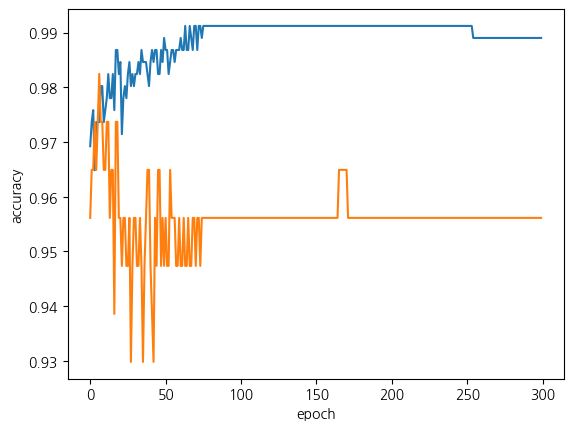

In [474]:
for _ in range (0,300):
    sc_all.partial_fit(train_scaled, y_train, classes=classes)
    train_score.append(sc_all.score(train_scaled, y_train))
    test_score.append(sc_all.score(test_scaled, y_test))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [475]:
sc_all = SGDClassifier(loss='log_loss',max_iter=100, random_state=42)
sc_all.fit(train_scaled, y_train)
print("Train score:",sc_all.score(train_scaled, y_train))
print("Test score:",sc_all.score(test_scaled, y_test))

Train score: 0.9824175824175824
Test score: 0.9649122807017544


In [476]:
results_all.append({
    "Model": "SGDClassifier",
    "Feature": "all",
    "Train Score": sc_all.score(train_scaled, y_train),
    "Test Score": sc_all.score(test_scaled, y_test)
})

- logistic 회귀 방법 보다는 과적합 성향을 보임

# 4) 결정트리

In [477]:
#결정트리
from sklearn.tree import DecisionTreeClassifier
dt_all = DecisionTreeClassifier(random_state=42)
dt_all.fit(X_train, y_train)
print("Train score:", dt_all.score(X_train, y_train))
print("Test score :", dt_all.score(X_test, y_test))
# 과적합-결정트리는 제한을 두지 않으면 훈련세트를 외워버림
# 결정트리의 과적합 특성을 확인하기 위해 max_depth 값만 제한하여 모델 복잡도 변화에 따른 성능을 비교

Train score: 1.0
Test score : 0.9473684210526315



| 범위        | max_depth 범위            |  
| --------- | ------------- |  
| 2 ~ 3     | 매우 단순, 설명용    |  
| **3 ~ 5** | ⭐ 가장 많이 쓰는 구간 |  
| 6 ~ 8     | 복잡, 과적합 위험    |  
| 10 이상     | 거의 암기 수준      |  


In [478]:
# max_depth=2, 과소적합
dt_all = DecisionTreeClassifier(max_depth=2,random_state=42)
dt_all.fit(X_train, y_train)
print("Train score:", dt_all.score(X_train, y_train))
print("Test score :", dt_all.score(X_test, y_test))

Train score: 0.9296703296703297
Test score : 0.9298245614035088


In [479]:
# max_depth=3, 적당
dt_all = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_all.fit(X_train, y_train)
print("Train score:", dt_all.score(X_train, y_train))
print("Test score :", dt_all.score(X_test, y_test))

Train score: 0.978021978021978
Test score : 0.9473684210526315


In [480]:
# max_depth=5, 과적합
dt_all = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_all.fit(X_train, y_train)
print("Train score:", dt_all.score(X_train, y_train))
print("Test score :", dt_all.score(X_test, y_test))

Train score: 0.9956043956043956
Test score : 0.9473684210526315


In [481]:
results_all.append({
    "Model": "DecisionTreeClassifier",
    "Feature": "all",
    "Train Score": dt_all.score(X_train, y_train),
    "Test Score": dt_all.score(X_test, y_test)
})

- max_depth=3이 train score, test score 차이가 비교적 적고 과소적합 위험도 없지만 다른 모델에 비해 과적합 성향을 보임

# 5) 앙상블 학습 (randomforest, extratree, gradientboosting, histgradientboosting) 비교

In [482]:
# RandomForest
# 훈련세트에서 중복을 허용해 부트스트랩 샘플을 만들어 결정트리를 훈련
# 부트스트랩 샘플에 포함되지 않은 샘플(OOB)을 가지고 미리 모델을 훈련해 볼 수 있음
# OOB 점수를 사용하면 교차 검증을 대신 할 수 있어서 훈련세트에 많은 샘플을 사용할 수 있음.
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf_all.fit(X_train, y_train)
print("Train score:", rf_all.score(X_train, y_train))
print("Test score :", rf_all.score(X_test, y_test))

Train score: 1.0
Test score : 0.9649122807017544


In [483]:
#Randomforest-모델의 중요도 제공
print(rf_all.feature_importances_)

[0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


In [484]:
X.columns
# 모델 평가에 'radius_worst', 'perimeter_worst', 'concave points_worst' 컬럼 순서대로 중요함

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [485]:
results_all.append({
    "Model": "RandomForestClassifier",
    "Feature": "all",
    "Train Score": rf_all.score(X_train, y_train),
    "Test Score": rf_all.score(X_test, y_test)
})

In [486]:
#GredientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb_all = GradientBoostingClassifier(random_state=42)
gb_all.fit(X_train, y_train)

print("Train score:", gb_all.score(X_train, y_train))
print("Test score :", gb_all.score(X_test, y_test))

Train score: 1.0
Test score : 0.956140350877193


In [487]:
#GredientBoosting-모델의 중요도
print(gb_all.feature_importances_)
# concave points_mean, concave points_worst, radius_worst, area_worst 순서로 앞에 extratree 중요도와 다름

[6.03462430e-05 2.78204554e-02 2.27696679e-04 4.28519444e-04
 2.48014476e-03 2.99604699e-03 1.13753893e-03 4.50444245e-01
 4.63697169e-04 4.34023568e-04 7.61276913e-03 3.48795198e-03
 3.67821319e-04 8.46169232e-03 3.46257796e-04 2.84666672e-03
 1.25510091e-02 1.99109101e-03 7.07212053e-04 4.31269932e-03
 7.53202723e-02 3.98948677e-02 5.14085935e-02 3.81840084e-02
 4.83123208e-03 4.50121585e-04 2.00225571e-02 2.40286635e-01
 2.46704016e-04 1.77122883e-04]


In [488]:
results_all.append({
    "Model": "GradientBoostingClassifier",
    "Feature": "all",
    "Train Score": gb_all.score(X_train, y_train),
    "Test Score": gb_all.score(X_test, y_test)
})

In [489]:
#HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_all = HistGradientBoostingClassifier(random_state=42)
hgb_all.fit(X_train, y_train)

print("Train score:", hgb_all.score(X_train, y_train))
print("Test score :", hgb_all.score(X_test, y_test))

Train score: 1.0
Test score : 0.9736842105263158


In [490]:
results_all.append({
    "Model": "HistGradientBoostingClassifier",
    "Feature": "all",
    "Train Score": hgb_all.score(X_train, y_train),
    "Test Score": hgb_all.score(X_test, y_test)
})

In [491]:
#GredientBoosting 알고리즘을 구현한 라이브러리
#대표적으로 XGBoost
from xgboost import XGBClassifier
xgb_all = XGBClassifier(tree_method='hist', random_state=42)
xgb_all.fit(X_train, y_train)

print("Train score:", xgb_all.score(X_train, y_train))
print("Test score :", xgb_all.score(X_test, y_test))

Train score: 1.0
Test score : 0.956140350877193


In [492]:
results_all.append({
    "Model": "XGBClassifier",
    "Feature": "all",
    "Train Score": xgb_all.score(X_train, y_train),
    "Test Score": xgb_all.score(X_test, y_test)
})

In [493]:
#결과 데이터프레임으로 변환
import pandas as pd

results_all_df = pd.DataFrame(results_all)
results_all_df

#test score 내림차순 정리
results_all_df.sort_values(by="Test Score", ascending=False)

,Model,Feature,Train Score,Test Score
1,LogisticRegression,all,0.986813,0.973684
6,HistGradientBoostingClassifier,all,1.000000,0.973684
4,RandomForestClassifier,all,1.000000,0.964912
2,SGDClassifier,all,0.982418,0.964912
5,GradientBoostingClassifier,all,1.000000,0.956140
7,XGBClassifier,all,1.000000,0.956140
3,DecisionTreeClassifier,all,0.995604,0.947368
0,KNeighborsClassifier,all,0.980220,0.947368


## 🎯 최종 추천 모델: LogisticRegression

Test Score 최고 수준 (0.9737)

Train–Test 간 차이 가장 작음  
 
과적합 없음  

- 비교를 위해 상관계수가 0.5 이상인 피쳐들만 모아서 다시 예측 모델 비교

- diagnosis_num 컬럼과 가장 상관계수가 0.5 이상인 피쳐는 다음과 같음 (EDA 부분에서 산출함)  
concave points_worst    0.793566  
perimeter_worst         0.782914  
concave points_mean     0.776614  
radius_worst            0.776454  
perimeter_mean          0.742636  
area_worst              0.733825  
radius_mean             0.730029  
area_mean               0.708984  
concavity_mean          0.696360  
concavity_worst         0.659610  
compactness_mean        0.596534  
compactness_worst       0.590998  
radius_se               0.567134  
perimeter_se            0.556141  
area_se                 0.548236  

In [494]:
corr50_features = [
    'concave points_worst',
    'perimeter_worst',
    'concave points_mean',
    'radius_worst',
    'perimeter_mean',
    'area_worst',
    'radius_mean',
    'area_mean',
    'concavity_mean',
    'concavity_worst',
    'compactness_mean',
    'compactness_worst',
    'radius_se',
    'perimeter_se',
    'area_se'
]

In [495]:
# y (타깃)
y = df['diagnosis_num']

# X (상관계수 0.5 이상인 피쳐만 모음)
X = df[corr50_features]

In [496]:
# train, test 세트 나눔
from sklearn.model_selection import train_test_split

X_train50, X_test50, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# 1) KNN

In [497]:
#표준화
from sklearn.preprocessing import StandardScaler

ss_corr50 = StandardScaler()
X_train50_scaled = ss_corr50.fit_transform(X_train50)
X_test50_scaled  = ss_corr50.transform(X_test50)

In [498]:
# KNN n_neighbors=3
from sklearn.neighbors import KNeighborsClassifier

kn_corr50 = KNeighborsClassifier(n_neighbors=3)
kn_corr50.fit(X_train50_scaled, y_train)

print("KNN (corr50)")
print("Train:", kn_corr50.score(X_train50_scaled, y_train))
print("Test :", kn_corr50.score(X_test50_scaled, y_test))

KNN (corr50)
Train: 0.9560439560439561
Test : 0.9649122807017544


In [499]:
# KNN n_neighbors=2
kn_corr50 = KNeighborsClassifier(n_neighbors=2)
kn_corr50.fit(X_train50_scaled, y_train)

print("KNN (corr50)")
print("Train:", kn_corr50.score(X_train50_scaled, y_train))
print("Test :", kn_corr50.score(X_test50_scaled, y_test))

KNN (corr50)
Train: 0.9560439560439561
Test : 0.9473684210526315


In [500]:
results_all.append({
    "Model": "KNeighborsClassifier",
    "Feature": "corr50",
    "Train Score": kn_corr50.score(X_train50_scaled, y_train),
    "Test Score": kn_corr50.score(X_test50_scaled, y_test)
})

- KNN 모델에서는 K=2가 적합. 그 이상이면 과소적합 성향을 보임

# 2) 로지스틱 회귀

In [501]:
#로지스틱회귀
from sklearn.linear_model import LogisticRegression

lr_corr50 = LogisticRegression()
lr_corr50.fit(X_train50_scaled, y_train)

print("Logistic (corr50)")
print("Train:", lr_corr50.score(X_train50_scaled, y_train))
print("Test :", lr_corr50.score(X_test50_scaled, y_test))

Logistic (corr50)
Train: 0.9582417582417583
Test : 0.9649122807017544


In [502]:
results_all.append({
    "Model": "LogisticRegression",
    "Feature": "corr50",
    "Train Score": lr_corr50.score(X_train50_scaled, y_train),
    "Test Score": lr_corr50.score(X_test50_scaled, y_test)
})

- 로지스틱 회귀에서는 과소적합 성향을 보임

# 3) 확률적 경사 하강법

In [503]:
#확률적경사하강법
# 몇번 훈련이 적합한지 확인해봄
from sklearn.linear_model import SGDClassifier
sc_all = SGDClassifier(loss='log_loss',random_state=42)
corr50_train_score = []
corr50_test_score = []
classes = np.unique(y_train)

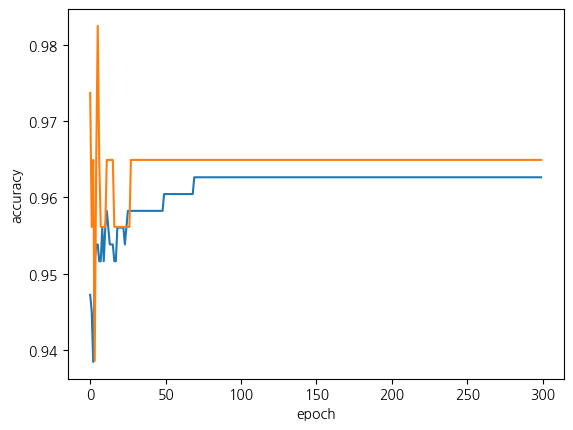

In [504]:
for _ in range (0,300):
    sc_all.partial_fit(X_train50_scaled, y_train, classes=classes)
    corr50_train_score.append(sc_all.score(X_train50_scaled, y_train))
    corr50_test_score.append(sc_all.score(X_test50_scaled, y_test))

import matplotlib.pyplot as plt
plt.plot(corr50_train_score)
plt.plot(corr50_test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [505]:
#max_iter=100 이후 부터는 일정, 그러나 과소적합임.
sc_corr50 = SGDClassifier(loss='log_loss',max_iter=100, random_state=42)
sc_corr50.fit(X_train50_scaled, y_train)
print("Train score:",sc_all.score(X_train50_scaled, y_train))
print("Test score:",sc_all.score(X_test50_scaled, y_test))

Train score: 0.9626373626373627
Test score: 0.9649122807017544


In [506]:
results_all.append({
    "Model": "SGDClassifier",
    "Feature": "corr50",
    "Train Score": sc_corr50.score(X_train50_scaled, y_train),
    "Test Score": sc_corr50.score(X_test50_scaled, y_test)
})

- 확률적 경사하강법도 과소적합

# 4) 결정트리

In [507]:
#결정트리
from sklearn.tree import DecisionTreeClassifier

dt_corr50 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_corr50.fit(X_train50, y_train)

print("DecisionTree (corr50)")
print("Train:", dt_corr50.score(X_train50, y_train))
print("Test :", dt_corr50.score(X_test50, y_test))

DecisionTree (corr50)
Train: 0.9692307692307692
Test : 0.9298245614035088


In [508]:
results_all.append({
    "Model": "DecisionTreeClassifier",
    "Feature": "corr50",
    "Train Score": dt_corr50.score(X_train50, y_train),
    "Test Score": dt_corr50.score(X_test50, y_test)
})

- 결정트리에서는 max_depth=3이 적당

# 5) 앙상블 학습 (randomforest, extratree, gradientboosting, histgradientboosting) 비교

In [509]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

rf_corr50 = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_corr50.fit(X_train50, y_train)

print("RandomForest (corr50)")
print("Train:", rf_corr50.score(X_train50, y_train))
print("Test :", rf_corr50.score(X_test50, y_test))

RandomForest (corr50)
Train: 1.0
Test : 0.956140350877193


In [510]:
results_all.append({
    "Model": "RandomForestClassifier",
    "Feature": "corr50",
    "Train Score": rf_corr50.score(X_train50, y_train),
    "Test Score": rf_corr50.score(X_test50, y_test)
})

In [511]:
from sklearn.ensemble import GradientBoostingClassifier

gb_corr50 = GradientBoostingClassifier(random_state=42)
gb_corr50.fit(X_train50, y_train)

print("GradientBoosting (corr50)")
print("Train:", gb_corr50.score(X_train50, y_train))
print("Test :", gb_corr50.score(X_test50, y_test))

GradientBoosting (corr50)
Train: 1.0
Test : 0.956140350877193


In [512]:
results_all.append({
    "Model": "GradientBoostingClassifier",
    "Feature": "corr50",
    "Train Score": gb_corr50.score(X_train50, y_train),
    "Test Score": gb_corr50.score(X_test50, y_test)
})

In [513]:
#그리디언트부스팅 모델 중 가장 과적합이 적어보였던 모델로 비교
#HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_corr50 = HistGradientBoostingClassifier(random_state=42)
hgb_corr50.fit(X_train50, y_train)

print("Train score:", hgb_corr50.score(X_train50, y_train))
print("Test score :", hgb_corr50.score(X_test50, y_test))

Train score: 1.0
Test score : 0.9649122807017544


In [514]:
results_all.append({
    "Model": "HistGradientBoostingClassifier",
    "Feature": "corr50",
    "Train Score": hgb_corr50.score(X_train50, y_train),
    "Test Score": hgb_corr50.score(X_test50, y_test)
})

In [515]:
#전체 피처(all)와 상관계수 0.5 이상 피처(corr50)를 사용하여 다양한 분류 모델의 train/test 성능을 비교
import pandas as pd

results_all_df = pd.DataFrame(results_all)
results_all_df

#test score 내림차순 정리
results_all_df.sort_values(by="Test Score", ascending=False)

,Model,Feature,Train Score,Test Score
1,LogisticRegression,all,0.986813,0.973684
6,HistGradientBoostingClassifier,all,1.000000,0.973684
10,SGDClassifier,corr50,0.953846,0.973684
4,RandomForestClassifier,all,1.000000,0.964912
14,HistGradientBoostingClassifier,corr50,1.000000,0.964912
9,LogisticRegression,corr50,0.958242,0.964912
2,SGDClassifier,all,0.982418,0.964912
13,GradientBoostingClassifier,corr50,1.000000,0.956140
12,RandomForestClassifier,corr50,1.000000,0.956140
5,GradientBoostingClassifier,all,1.000000,0.956140


# 결론
- 전체 피처를 사용한 Logistic Regression 모델이 가장 높은 test 성능과   안정적인 일반화 능력을 보여 최종 예측 모델로 적합한 것으로 보임  
  
- diagnosis와 상관관계가 0.5 이상인 피쳐들만 선별해서 예측 모델을 비교해 봤을 때 SGDClassifier가 가장 성능이 좋고 안정성을 보임.

In [516]:
# 번외
# mean 값들만 넣고 예측모델 돌리면 score에 어떤 변화가 있을까?

mean_features = [
    'concave points_mean',
    'perimeter_mean',
    'radius_mean',
    'area_mean',
    'concavity_mean',
    'compactness_mean',
    'texture_mean',
    'smoothness_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

In [517]:
# y (타깃)
y = df['diagnosis_num']

# X (mean 피쳐만 모음)
X = df[mean_features]

In [518]:
# train, test 세트 나눔
from sklearn.model_selection import train_test_split

X_train_mean, X_test_mean, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [519]:
#표준화
from sklearn.preprocessing import StandardScaler

ss_mean = StandardScaler()
X_train_mean_scaled = ss_mean.fit_transform(X_train_mean)
X_test_mean_scaled  = ss_mean.transform(X_test_mean)

In [520]:
#로지스틱회귀
from sklearn.linear_model import LogisticRegression

lr_mean = LogisticRegression()
lr_mean.fit(X_train_mean_scaled, y_train)

print("Logistic (mean)")
print("Train:", lr_mean.score(X_train_mean_scaled, y_train))
print("Test :", lr_mean.score(X_test_mean_scaled, y_test))

Logistic (mean)
Train: 0.9428571428571428
Test : 0.9385964912280702


In [521]:
#확률적경사하강법
# 몇번 훈련이 적합한지 확인해봄
from sklearn.linear_model import SGDClassifier
sc_mean = SGDClassifier(loss='log_loss',random_state=42)
mean_train_score = []
mean_test_score = []
classes = np.unique(y_train)

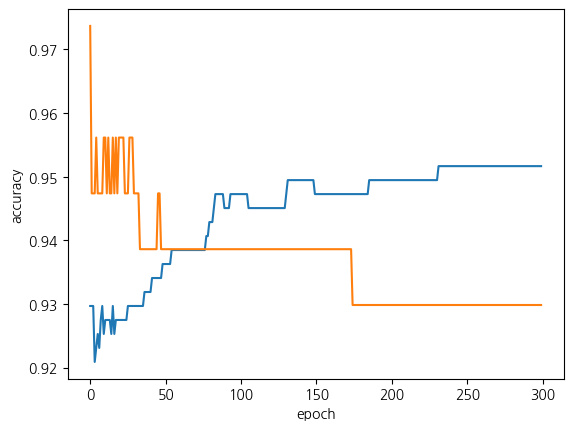

In [522]:
for _ in range (0,300):
    sc_mean.partial_fit(X_train_mean_scaled, y_train, classes=classes)
    mean_train_score.append(sc_mean.score(X_train_mean_scaled, y_train))
    mean_test_score.append(sc_mean.score(X_test_mean_scaled, y_test))

import matplotlib.pyplot as plt
plt.plot(mean_train_score)
plt.plot(mean_test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [523]:
# 과소적합
sc_mean = SGDClassifier(loss='log_loss',max_iter=1000, random_state=42)
sc_mean.fit(X_train_mean_scaled, y_train)
print("Train score:",sc_mean.score(X_train_mean_scaled, y_train))
print("Test score:",sc_mean.score(X_test_mean_scaled, y_test))

Train score: 0.9208791208791208
Test score: 0.9473684210526315


- mean 값만 추려진 데이터 보다 모든 피쳐가 들어간 예측모델이 더 안정성 있고 예측률이 높음